In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90])
y = np.array([0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6 ])

print(x)
print(y)

[0.03 0.19 0.34 0.46 0.78 0.81 1.08 1.18 1.39 1.6  1.65 1.9 ]
[0.67 0.85 1.05 1.   1.4  1.5  1.3  1.54 1.55 1.68 1.73 1.6 ]


$$y = f[x, \phi] = \phi_0 + \phi_1 x$$

In [3]:
def f(x, phi0, phi1):
  y = phi0 + phi1 * x
  return y

In [4]:
def plot(x, y, phi0, phi1):
  fig, ax = plt.subplots()
  ax.scatter(x, y)
  plt.xlim(0, 2.0)
  plt.ylim(0, 2.0)
  ax.set_xlabel("Input, x")
  ax.set_ylabel("Output, y")
  
  x_line = np.arange(0, 2.0, 0.01)
  y_line = f(x_line, phi0, phi1)
  plt.plot(x_line, y_line, "b-", lw=2)
  
  plt.show()

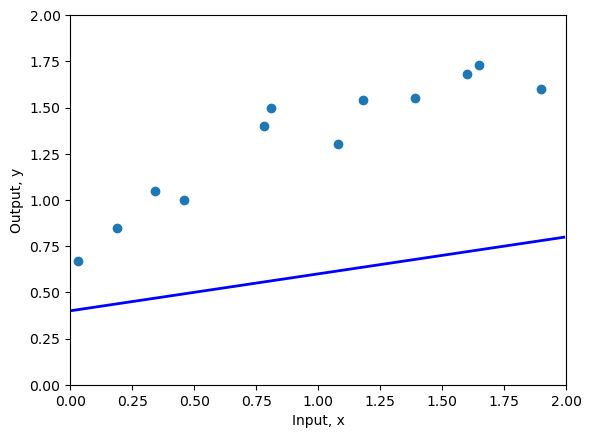

In [5]:
phi0 = 0.4
phi1 = 0.2

plot(x, y, phi0, phi1)

$$L[\phi] = \sum_{i=1}^{I} (f[x_i, \phi] - y_i)^2 = \sum_{i=1}^{I} (\phi_0 + \phi_1 x_i - y_i)^2$$

In [6]:
def compute_loss(x, y, phi0, phi1):
  loss = np.sum((f(x, phi0, phi1) - y)**2)
  
  return loss

In [7]:
loss = compute_loss(x,y,phi0,phi1)
print(f'Loss = {loss:3.2f}')

Loss = 7.07


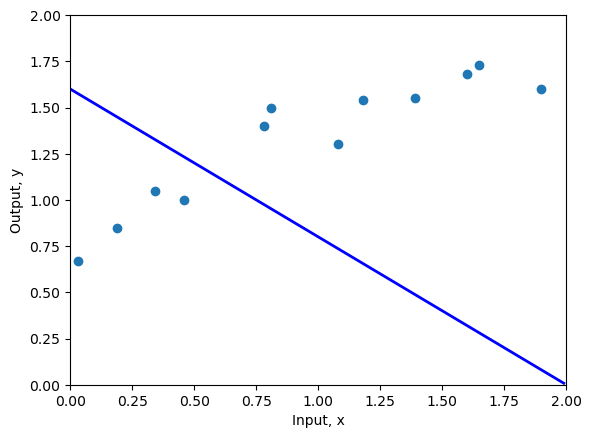

Loss = 10.28


In [8]:
phi0 = 1.60 ; phi1 =-0.8

plot(x,y,phi0,phi1)

loss = compute_loss(x,y,phi0,phi1)

print(f'Loss = {loss:3.2f}')

In [9]:
phi0_mesh, phi1_mesh = np.meshgrid(np.arange(0.0, 2.0, 0.02), np.arange(-1.0, 1.0, 0.02))
phi1_mesh.shape

(100, 100)

In [10]:
all_losses = np.zeros_like(phi1_mesh)

for indices, temp in np.ndenumerate(phi1_mesh):
  all_losses[indices] = compute_loss(x, y, phi0_mesh[indices], phi1_mesh[indices])

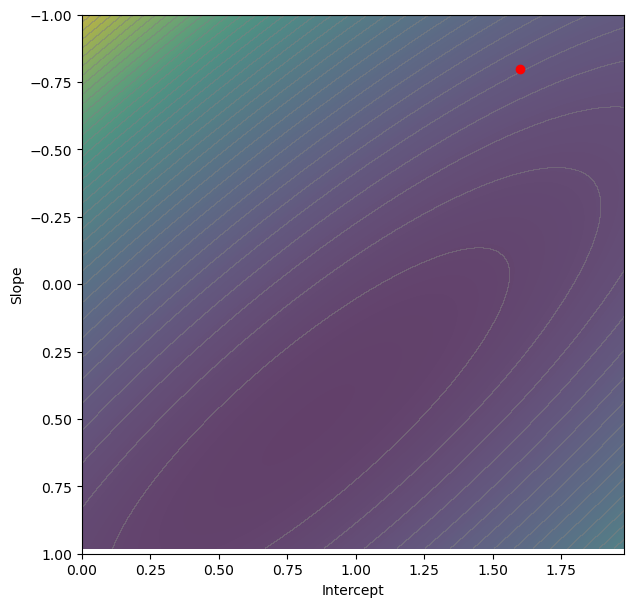

In [11]:
fig = plt.figure()
ax = plt.axes()
fig.set_size_inches(7, 7)
levels = 256
ax.contourf(phi0_mesh, phi1_mesh, all_losses, levels)

levels = 40
ax.contourf(phi0_mesh, phi1_mesh, all_losses, levels, colors=["#80808080"])

ax.set_ylim([1, -1])
ax.set_xlabel(r'Intercept')
ax.set_ylabel(r'Slope')

ax.plot(phi0,phi1,'ro')
plt.show()